### Importing the libraries

In [9]:
import numpy as np
import pandas as pd 
import seaborn as sns
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import vaex
import vaex.ml

%matplotlib inline
sns.set_theme(context='notebook', style='darkgrid', font='sans-serif', font_scale=1, color_codes=True, rc=None)
plt.style.use("dark_background")

### Import the dataset

In [11]:
df = pd.read_csv("/path/popularity_score_dataset.csv")
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [12]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [13]:
# Drop the "Unnamed: 0" column automatically generated by Google colab
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### EDA

1. Have a general look at the dataset: use df.head() and try to understand what the columns are saying. It is a good practice to write down the columns and their measurement.
2. Look at the summary statistics of the data: use df.describe() to get a quick overview of the central tendency, dispersion, and shape of the distribution of each variable.
3. Check for errors: count the Not a Number (NaN) values in the DataFrame using df.isnull().sum()
4. Check for duplicate records: use df.duplicated().sum() to count the number of duplicates
5. Correlation: use df.corr() to compute the Pearson Correlation matrix of the columns. Visualize the correlation matrix using a heatmap.
6. Plot the distribution: How is your data distributed? It may happen that some variables have some kind of skewed/asymmetric/broad distribution. Check for the distribution by using df.plot(kind='hist') or df.plot(kind='kde') for a more detailed representation.
7. Plot the relationship between variables: use seaborn's scatterplot (sns.scatterplot) to understand the relationship between the columns.

#### 1.Header

In [14]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


We set the "track_id" column as index because it represents a unique identifier of each track

Variables description

● track_id: A unique identifier for each track.

● artists: The artists who performed the track. A single track can have multiple artists,
separated by a comma.

● album_name: The name of the album that the track appears on.

● track_name: The name of the track.

● popularity: The popularity score of the track, ranging from 0 to 100.

● duration_ms: The duration of the track in milliseconds.

● explicit: A binary value indicating whether the track contains explicit lyrics.

● danceability: A score indicating how danceable the track is, ranging from 0 to 1.

● energy: A score indicating the energy level of the track, ranging from 0 to 1.

● key: The key that the track is in (e.g., C, D, E, etc.).

● loudness: The loudness of the track in decibels (dB).

● mode: The mode of the track (major or minor).

● speechiness: A score indicating how much speech-like content is in the track, ranging
from 0 to 1.

● acousticness: A score indicating how acoustic the track is, ranging from 0 to 1.

● instrumentalness: A score indicating how instrumental the track is, ranging from 0 to 1.

● liveness: A score indicating the presence of an audience in the recording, ranging from 0
to 1.

● valence: A score indicating the positivity of the track, ranging from 0 to 1.

● tempo: The tempo of the track in beats per minute (BPM).

● time_signature: The time signature of the track (e.g., 4/4, 3/4, etc.).

● track_genre: The genre of the track (if available).

In [15]:
#let's see all the different track genre
df['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

#### 2.Description

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

We can see that 
- There are 18 features for 114000 observation
- There are 3 Null value, one each for the first 3 columns
- There are 4 categorical columns (first three and the last one) and one boolean column ("explicit"). 

In [17]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


We can see that:
- Variables have different scale and range

#### 3.Check for non valid values

In [18]:
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

#### 4.Check for duplicates

In [19]:
df.duplicated().sum()

450

In the features description part it is written that the "track_id" is unique for each song but we can see that:

In [20]:
# Check first the total number of observation and then the number of unique "track_id"
print("Total number of observation:" + str(len(df["track_id"])))
print("Total number of observation:" + str(df['track_id'].nunique()))

Total number of observation:114000
Total number of observation:89741


I can see that out of a total of 113,549 observations, only 89,740 are unique

#### 5.Correlation

In [21]:
df.corr()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,-0.007101,0.044082,0.035448,0.001056,-0.003853,0.050423,-0.013931,-0.044927,-0.025472,-0.095139,-0.005387,-0.040534,0.013205,0.031073
duration_ms,-0.007101,1.000000,-0.065263,-0.073426,0.058523,0.008114,-0.003470,-0.035556,-0.062600,-0.103788,0.124371,0.010321,-0.154479,0.024346,0.018225
explicit,0.044082,-0.065263,1.000000,0.122507,0.096955,0.004484,0.108588,-0.037212,0.307952,-0.094403,-0.103404,0.032549,-0.003381,-0.002816,0.038386
danceability,0.035448,-0.073426,0.122507,1.000000,0.134325,0.036469,0.259077,-0.069219,0.108626,-0.171533,-0.185606,-0.131617,0.477341,-0.050450,0.207218
energy,0.001056,0.058523,0.096955,0.134325,1.000000,0.048006,0.761690,-0.078362,0.142509,-0.733906,-0.181879,0.184796,0.258934,0.247851,0.187126
key,-0.003853,0.008114,0.004484,0.036469,0.048006,1.000000,0.038590,-0.135916,0.020418,-0.040937,-0.006823,-0.001600,0.034103,0.010917,0.015065
loudness,0.050423,-0.003470,0.108588,0.259077,0.761690,0.038590,1.000000,-0.041764,0.060826,-0.589803,-0.433477,0.076899,0.279848,0.212446,0.191992
mode,-0.013931,-0.035556,-0.037212,-0.069219,-0.078362,-0.135916,-0.041764,1.000000,-0.046532,0.095553,-0.049955,0.014012,0.021953,0.000566,-0.024092
speechiness,-0.044927,-0.062600,0.307952,0.108626,0.142509,0.020418,0.060826,-0.046532,1.000000,-0.002186,-0.089616,0.205219,0.036635,0.017273,-0.000011
acousticness,-0.025472,-0.103788,-0.094403,-0.171533,-0.733906,-0.040937,-0.589803,0.095553,-0.002186,1.000000,0.104027,-0.020700,-0.107070,-0.208224,-0.176138


<AxesSubplot:>

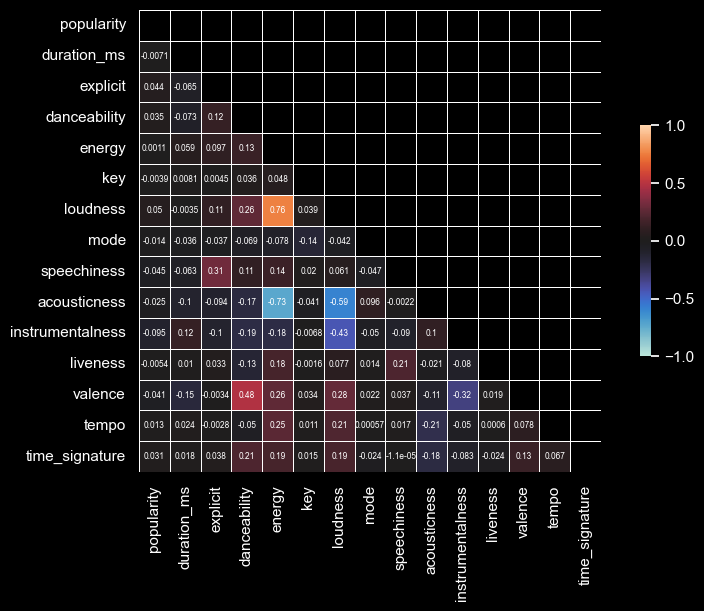

In [22]:
# Plotting the diagonal correlation matrix

# Compute correlation matrix
corr_matrix = df.corr()

# Generate a mask for the upper triangle. In order to visualize the diagonal 
# correlation matrix and not the entire once.
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) 

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, mask=mask, vmax= 1, vmin= -1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={'fontsize': 6})

#### 6.Plot the distribution

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'time_signature'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

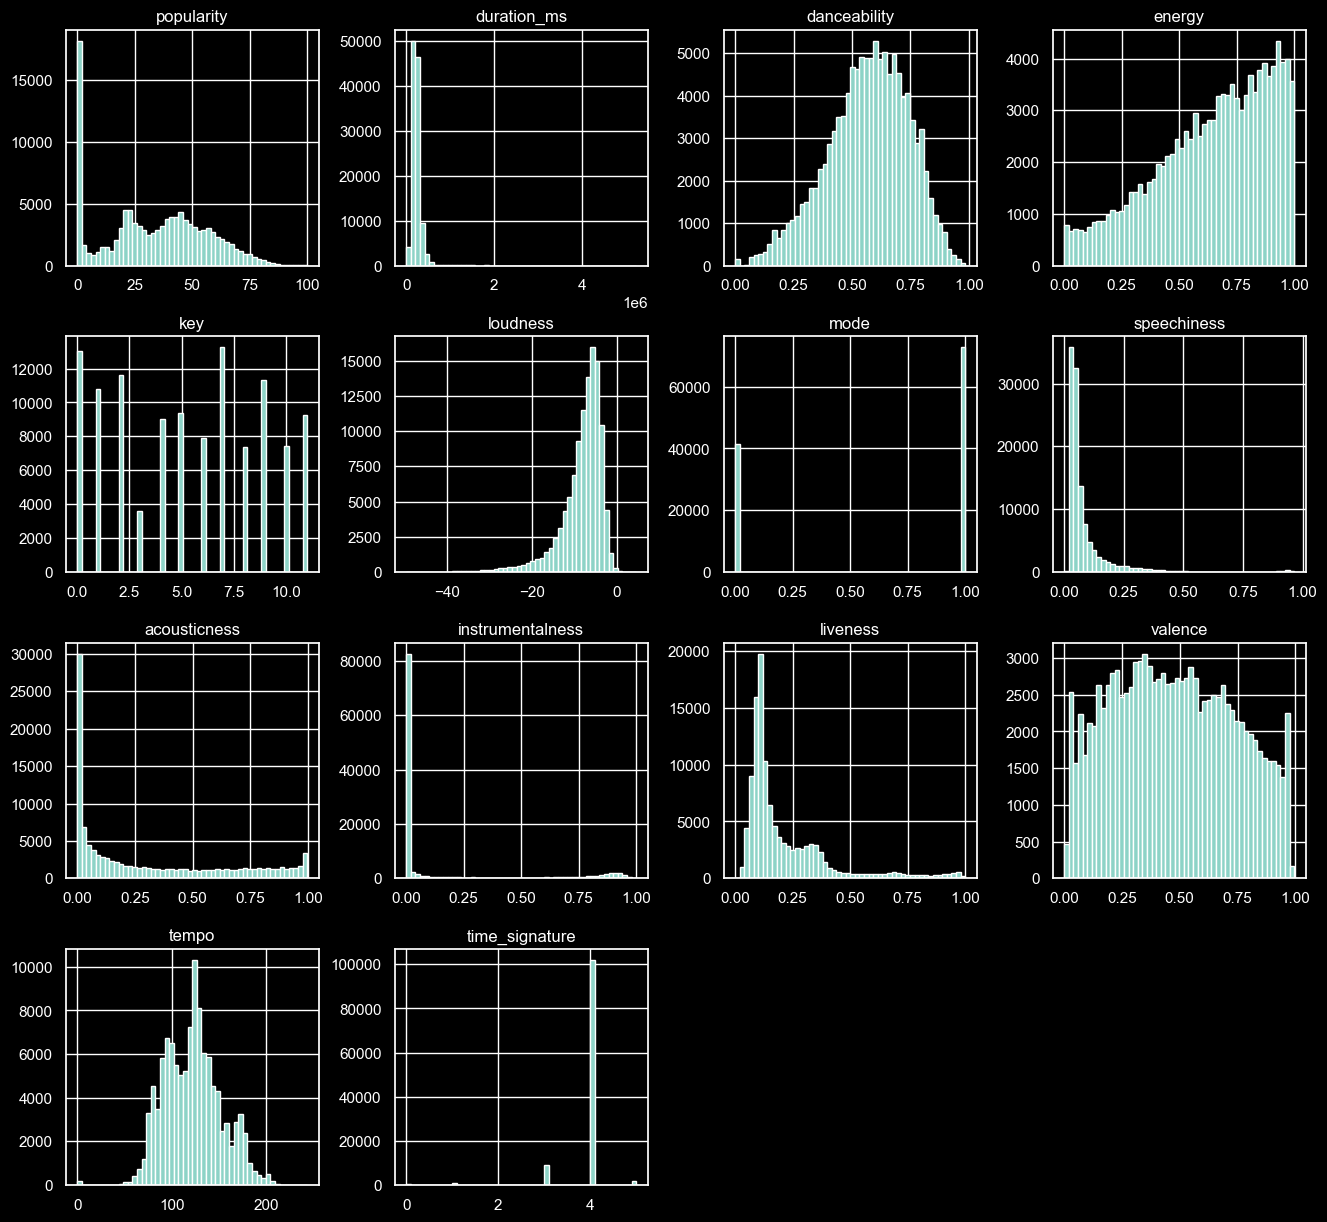

In [23]:
# Plot the distribution of each feature 
df.hist(bins=50, figsize=(16,15))

We can see that:
- Also the "mode" variable is boolean.
- The "time_singature" variable is a discrete variable [0,5]

In [24]:
# Count the recurrent observation of track genre
print(df['track_genre'].describe())
df['track_genre'].value_counts()

count       114000
unique         114
top       acoustic
freq          1000
Name: track_genre, dtype: object


acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: track_genre, Length: 114, dtype: int64

We can see that there 114 different genres, in the dataset there are 1000 tracks for every type of genres

## Data Cleaning

#### Handling null value

I have only 3 null values, so I decide to drop them

In [25]:
df.dropna(inplace=True)

#### Handling duplicates

I decide to drop all the duplicates, because they could lead to an incorrect analysis

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
# Check whether the two operations have been correctly carried out  
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113549 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113549 non-null  object 
 1   artists           113549 non-null  object 
 2   album_name        113549 non-null  object 
 3   track_name        113549 non-null  object 
 4   popularity        113549 non-null  int64  
 5   duration_ms       113549 non-null  int64  
 6   explicit          113549 non-null  bool   
 7   danceability      113549 non-null  float64
 8   energy            113549 non-null  float64
 9   key               113549 non-null  int64  
 10  loudness          113549 non-null  float64
 11  mode              113549 non-null  int64  
 12  speechiness       113549 non-null  float64
 13  acousticness      113549 non-null  float64
 14  instrumentalness  113549 non-null  float64
 15  liveness          113549 non-null  float64
 16  valence           11

We have already seen that there are multiple observations with the same 'track_id', as this feature represents a unique song that may belong to different albums or be recognized with different music genres. For the prediction and classification of the 'popularity', we want to keep only the most popular version of each song. However, we didn't do this  for the clustering part since it is not influent and we want to retain all the information regarding the different music genres.

## Clustering

### Split train and test

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

Due to the fact that we will have to add to the training and test set the column of the clusters to check if this is a valid method to solve our task; we will create two dummy train and test sets so thta they will not be subject to all the preprocessing and we will able to better use them later. N.B. the nt in the variables means 'No Transformations'

In [29]:
X_train_nt = X_train.copy()
X_test_nt = X_test.copy()

There are by the way some columns that can be dropped by both the training and the test set.

In [30]:
# We  remove the "track_genre", "track_name" and "track_id" column, because these informations are not relevant to my analysis
X_train.drop(["track_genre","track_name", "track_id"], axis=1, inplace=True)
X_test.drop(["track_genre","track_name", "track_id"], axis=1, inplace=True)

In [31]:
X_train

,artists,album_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
110535,Kathryn Gallagher,I'll Get the Coffee,50,199537,False,0.805,0.5330,9,-5.658,1,0.0362,0.027600,0.057800,0.2030,0.5470,132.979,4
15938,Skinny Atlas;dhan,I Believed,41,160000,False,0.962,0.2650,11,-11.224,0,0.0796,0.525000,0.008840,0.1060,0.3200,120.017,4
101623,Nature Sounds,Crickets,34,109388,False,0.495,0.0637,1,-28.966,1,0.0661,0.890000,0.845000,0.0617,0.0914,110.096,5
67235,Wisin & Yandel;Anthony Santos,Última Misión Reggaeton,0,205773,True,0.721,0.7140,11,-5.436,0,0.2340,0.107000,0.000000,0.5620,0.5060,94.002,4
22842,At The Gates,To Drink From The Night Itself,21,230746,False,0.395,0.9010,0,-5.547,1,0.0391,0.000004,0.879000,0.0615,0.3570,90.510,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77136,Péricles,"Mensageiro do Amor, Pt. 1 (Ao Vivo)",51,647866,False,0.516,0.7720,6,-5.634,0,0.0409,0.447000,0.000000,0.5530,0.5720,160.048,4
110713,Matt Fax,To The Ground,49,233440,False,0.556,0.8550,6,-8.916,1,0.0693,0.013700,0.323000,0.2020,0.0534,123.989,4
104137,Benny,Cielo,43,211560,False,0.601,0.5360,0,-6.349,1,0.0397,0.575000,0.000000,0.1690,0.3490,137.354,3
860,The Mayries,I Will Wait,44,216841,False,0.421,0.1070,6,-15.191,1,0.0335,0.948000,0.000000,0.0881,0.1180,104.218,4


In [32]:
print(pd.DataFrame(X_train).info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90839 entries, 110535 to 15816
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           90839 non-null  object 
 1   album_name        90839 non-null  object 
 2   popularity        90839 non-null  int64  
 3   duration_ms       90839 non-null  int64  
 4   explicit          90839 non-null  bool   
 5   danceability      90839 non-null  float64
 6   energy            90839 non-null  float64
 7   key               90839 non-null  int64  
 8   loudness          90839 non-null  float64
 9   mode              90839 non-null  int64  
 10  speechiness       90839 non-null  float64
 11  acousticness      90839 non-null  float64
 12  instrumentalness  90839 non-null  float64
 13  liveness          90839 non-null  float64
 14  valence           90839 non-null  float64
 15  tempo             90839 non-null  float64
 16  time_signature    90839 non-null  i

### Encoding and Scaling

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90839 entries, 110535 to 15816
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           90839 non-null  object 
 1   album_name        90839 non-null  object 
 2   popularity        90839 non-null  int64  
 3   duration_ms       90839 non-null  int64  
 4   explicit          90839 non-null  bool   
 5   danceability      90839 non-null  float64
 6   energy            90839 non-null  float64
 7   key               90839 non-null  int64  
 8   loudness          90839 non-null  float64
 9   mode              90839 non-null  int64  
 10  speechiness       90839 non-null  float64
 11  acousticness      90839 non-null  float64
 12  instrumentalness  90839 non-null  float64
 13  liveness          90839 non-null  float64
 14  valence           90839 non-null  float64
 15  tempo             90839 non-null  float64
 16  time_signature    90839 non-null  i

Let's encode the categorical variables "album_name" and "artists" using vaex

In [34]:
# Convert the train and test columns "album_name" and "artists" to Vaex 
X_train_vaex = vaex.from_pandas(X_train[["album_name", "artists"]])
X_test_vaex = vaex.from_pandas(X_test[["album_name", "artists"]])

# Encod the two columns through the MultiHotEncoder 
multi_hot_encoder = vaex.ml.MultiHotEncoder(features=["artists", "album_name"], fill_value=0)

# fid and transform on the train but only transform on the test
X_train_vaex = multi_hot_encoder.fit_transform(X_train_vaex)
X_test_vaex = multi_hot_encoder.transform(X_test_vaex)

In [35]:
# Drop the "album_name" and "artists" original categorical variables from both sets
X_train = X_train.drop(["album_name", "artists"], axis=1)
X_test = X_test.drop(["album_name", "artists"], axis=1)

X_train.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
110535,50,199537,False,0.805,0.5330,9,-5.658,1,0.0362,0.027600,0.05780,0.2030,0.5470,132.979,4
15938,41,160000,False,0.962,0.2650,11,-11.224,0,0.0796,0.525000,0.00884,0.1060,0.3200,120.017,4
101623,34,109388,False,0.495,0.0637,1,-28.966,1,0.0661,0.890000,0.84500,0.0617,0.0914,110.096,5
67235,0,205773,True,0.721,0.7140,11,-5.436,0,0.2340,0.107000,0.00000,0.5620,0.5060,94.002,4
22842,21,230746,False,0.395,0.9010,0,-5.547,1,0.0391,0.000004,0.87900,0.0615,0.3570,90.510,4


In [36]:
# Reconvert the 2 columns from vaex to pandas
encoded_train = pd.DataFrame(X_train_vaex)
encoded_test = pd.DataFrame(X_test_vaex)

# Reset the index of the encoded train and test sets
encoded_train.reset_index(drop=True, inplace=True)
encoded_test.reset_index(drop=True, inplace=True)

# Concatenate only the train encoded set to the original one
X_train = pd.concat([encoded_train, X_train.reset_index(drop=True)], axis=1)
X_test = pd.concat([encoded_test, X_test.reset_index(drop=True)], axis=1)

I can see that I have to encode the first three columns that are categorical, I'm going to use One Hot Encoder because I don't want to give them a ranking, and encode the boolean variable "explicit".

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from category_encoders import BinaryEncoder

# Convert all columns names to string, because ColumnTransformer expect all names as string type
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Define column transformer
# I set in the encoder handle_unknown="ignore" to ensure In summary, 
# to preserve the observation of the author column
ct = ColumnTransformer(
    [('binary', BinaryEncoder(), ["explicit"]), 
     ('scale', MinMaxScaler(), ["popularity", "duration_ms", "danceability", "key", "loudness",
                                  "speechiness", "acousticness", "valence", "tempo", "time_signature"])],
                                   remainder="passthrough")

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [38]:
# Let's see if the preprocess has been performed correctly
print(pd.DataFrame(X_train).head())
print(pd.DataFrame(X_test).head())

    0     1         2         3         4         5         6         7   \
0  0.0  0.50  0.036520  0.818089  0.818182  0.842011  0.037513  0.027711   
1  0.0  0.41  0.028958  0.977642  1.000000  0.735189  0.082487  0.527108   
2  0.0  0.34  0.019279  0.503049  0.090909  0.394684  0.068497  0.893574   
3  1.0  0.00  0.037712  0.732724  1.000000  0.846272  0.242487  0.107430   
4  0.0  0.21  0.042488  0.401423  0.000000  0.844142  0.040518  0.000004   

         8         9   ...   37   38   39   40   41   42      43   44  \
0  0.549749  0.597377  ...  1.0  0.0  1.0  1.0  1.0  1.0  0.5330  1.0   
1  0.321608  0.539148  ...  1.0  0.0  0.0  1.0  1.0  1.0  0.2650  0.0   
2  0.091859  0.494580  ...  1.0  1.0  1.0  1.0  0.0  0.0  0.0637  1.0   
3  0.508543  0.422282  ...  0.0  1.0  1.0  0.0  0.0  1.0  0.7140  0.0   
4  0.358794  0.406595  ...  0.0  0.0  1.0  0.0  1.0  0.0  0.9010  1.0   

        45      46  
0  0.05780  0.2030  
1  0.00884  0.1060  
2  0.84500  0.0617  
3  0.00000  0.5620  

### Build the model

In [39]:
from sklearn.cluster import KMeans

# Create a k-means clustering model with the k-means++ initialization method
kmeans = KMeans(n_clusters=df["track_genre"].nunique(), init='k-means++', random_state=0)

# Fit the model to our data
kmeans.fit(X_train)

# Get the cluster labels for the training and test data
train_labels = kmeans.predict(X_train)
test_labels = kmeans.predict(X_test)

In [40]:
print(train_labels)
print(test_labels)

[ 68 101   4 ... 111  37  39]
[58 26 22 ... 78 30 26]


In [41]:
# Add the labels from clustering arrays as new columns to the train and test labelled sets
X_train_nt['label_clustering'] = train_labels
X_train_nt

X_test_nt['label_clustering'] = test_labels
X_test_nt

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,label_clustering
77407,73WpXYXqQFUuSkIul0VzSI,Bom Gosto;Pericles,Balanço por Você (Ao Vivo),Balanço por Você - Ao Vivo,45,208512,False,0.427,0.7030,9,...,1,0.0487,0.575000,0.000000,0.9350,0.700,84.440,4,pagode,58
96769,6PphhDw4Fa1U2TJkhejpdD,Akatu,Luau do Akatu,Eu Me Apaixonei pela Pessoa Errada,37,105389,False,0.652,0.7010,2,...,1,0.0348,0.532000,0.000002,0.6020,0.928,158.124,4,samba,26
6993,1LL4f5D8E5sdURjuADBD8s,Carnifex,Hell Chose Me (Bonus Track Version),The Scope Of Obsession,17,175906,False,0.573,0.9760,1,...,0,0.1790,0.000046,0.022200,0.2720,0.315,114.020,4,black-metal,22
75387,1EMSJMfd1lFvJtggclY05l,Ann Sweeten,Where Butterflies Dance,Migration,23,284373,False,0.281,0.1410,4,...,0,0.0334,0.978000,0.883000,0.1030,0.206,135.356,3,new-age,105
61284,3FqtPK5WMKBCLplivwZtn7,STU48,ヘタレたちよ Special Edition,ヘタレたちよ,25,289280,False,0.403,0.9210,9,...,1,0.1100,0.032600,0.000000,0.0985,0.574,177.824,4,j-idol,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79820,3qLlQ4RLl3B8PaEdIG6H0d,Tomas Lee,Every Breath You Take,Every Breath You Take,55,227858,False,0.316,0.0538,8,...,1,0.0642,0.995000,0.941000,0.1060,0.150,204.556,4,piano,16
58108,2dvgoGTEjoPWou8KdL9h1g,JPEGMAFIA,LP!,WHAT KIND OF RAPPIN' IS THIS?,59,112451,True,0.373,0.9670,1,...,1,0.2020,0.253000,0.000073,0.4990,0.666,139.030,4,industrial,7
67914,7lmeLXvVcpj2QbqgHjwB4G,Ñejo & Dalmata,Perreo en Halloween,Hoy Me Atrevo,2,208800,False,0.844,0.8410,4,...,0,0.1380,0.156000,0.000037,0.0501,0.831,97.996,4,latin,78
84525,41vwUZryPYjNSzoXiBaaQ7,Cem Karaca,"Cem Karaca Anısına, Vol. 3",Kazak Abdal,31,109226,False,0.580,0.8810,0,...,1,0.0520,0.700000,0.000018,0.0425,0.874,119.484,4,psych-rock,30


In [42]:
# Let's do some visual comparison between the lclustering_labels and track_genre
X_train_nt.sort_values(by='track_genre', ascending=True).head(30)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,label_clustering
596,03SqUp5aNqCM8EP4WOmUZp,The Bridge City Sinners,Bridge City Sinners,Stray Cat Strut,29,128731,False,0.490,0.7490,9,...,0,0.0649,0.389000,0.000000,0.0792,0.7390,144.870,4,acoustic,110
725,6QYEoTGa0Boucy6htF83tb,Melvin Taylor;Lucky Peterson;Titus Williams;Ra...,"Plays the Blues for You (feat. Lucky Peterson,...",Cadillac Assembly Line,55,318333,False,0.735,0.3550,9,...,0,0.0387,0.656000,0.094000,0.1190,0.7240,93.553,4,acoustic,75
120,5O9R57EozcpLKGQBzadPVy,Meg Birch,Life Sucks Playlist,Only Love Can Hurt Like This,43,194194,False,0.534,0.2130,1,...,1,0.0283,0.884000,0.000000,0.1070,0.0998,98.385,4,acoustic,15
405,5LuSu8fS8PGCH88EDPLYcy,Amber Leigh Irish,Save Your Tears (Acoustic),Save Your Tears - Acoustic,49,177818,False,0.693,0.1110,0,...,1,0.0379,0.937000,0.000001,0.0858,0.2470,110.813,4,acoustic,71
237,1jkBuvWI9IGEz9thXiKOlP,Joshua Hyslop,In Deepest Blue (Bonus Track Version),The Spark - Bonus Track,51,201933,False,0.596,0.4290,3,...,1,0.0377,0.775000,0.010700,0.0962,0.2290,148.086,4,acoustic,3
216,5auMzVHFr5Zfw6IbKarZ56,Anna Nalick,Wreck of the Day,Breathe (2 AM),65,279826,False,0.386,0.4520,2,...,1,0.0278,0.417000,0.000000,0.0881,0.2870,169.837,3,acoustic,69
891,6HRfUOW2Il3284ktPdxoGx,Ramshackle Glory,Live the Dream,Of Ballots and Barricades - Live,27,104200,False,0.582,0.4370,7,...,1,0.0524,0.451000,0.000000,0.1490,0.9220,130.467,3,acoustic,87
15,1KHdq8NK9QxnGjdXb55NiG,Landon Pigg,The Boy Who Never,Falling in Love at a Coffee Shop,58,244986,False,0.489,0.5610,4,...,1,0.0274,0.200000,0.000046,0.1790,0.2380,83.457,3,acoustic,111
11,5ivF4eQBqJiVL5IAE9jRyl,Jason Mraz,Love Is a Four Letter Word,I Won't Give Up,69,240165,False,0.483,0.3030,4,...,1,0.0429,0.694000,0.000000,0.1150,0.1390,133.406,3,acoustic,40
750,0N8Xztr4pBHJ7V0moJWhbO,Aimyon,青春のエキサイトメント,愛を伝えたいだとか,65,235240,False,0.673,0.8500,2,...,1,0.0337,0.034500,0.000011,0.0943,0.7930,100.008,4,acoustic,39


In order to assign a cluster to each track genre, we decided to count the cluster number that appears mostly for each genre

In [43]:
# Create a cycle that assign a cluster to each genre based on the cluster number that appears mostly and
# store the results in a dictionary called "assign"
assign_train = {}
l = list(X_train_nt["track_genre"].unique())
for i in l:
  voting = X_train_nt[X_train_nt["track_genre"] == i]["label_clustering"].value_counts()
  cluster = voting.iloc[0]
  assign_train[i] = cluster
assign_train

{'trance': 41,
 'chill': 127,
 'sleep': 59,
 'latin': 69,
 'death-metal': 33,
 'party': 55,
 'turkish': 28,
 'goth': 46,
 'french': 22,
 'trip-hop': 32,
 'rock-n-roll': 60,
 'house': 29,
 'dubstep': 40,
 'songwriter': 35,
 'drum-and-bass': 25,
 'metal': 50,
 'ska': 30,
 'german': 92,
 'dance': 40,
 'gospel': 33,
 'punk': 25,
 'heavy-metal': 49,
 'chicago-house': 43,
 'happy': 115,
 'idm': 29,
 'hard-rock': 50,
 'power-pop': 55,
 'punk-rock': 32,
 'rock': 43,
 'country': 44,
 'guitar': 56,
 'black-metal': 26,
 'metalcore': 31,
 'show-tunes': 55,
 'mpb': 26,
 'alternative': 41,
 'synth-pop': 50,
 'brazil': 19,
 'swedish': 32,
 'opera': 39,
 'dub': 31,
 'children': 93,
 'indie': 69,
 'spanish': 28,
 'techno': 29,
 'sertanejo': 44,
 'pagode': 36,
 'blues': 63,
 'comedy': 66,
 'disney': 91,
 'industrial': 28,
 'hardcore': 33,
 'club': 142,
 'indie-pop': 32,
 'electronic': 33,
 'sad': 130,
 'ambient': 62,
 'acoustic': 38,
 'minimal-techno': 29,
 'pop': 28,
 'alt-rock': 41,
 'electro': 27,
 '

In [44]:
# Same for the test set 
assign_test = {}
l = list(X_test_nt["track_genre"].unique())
for i in l:
  voting = X_test_nt[X_test_nt["track_genre"] == i]["label_clustering"].value_counts()
  cluster = voting.iloc[0]
  assign_test[i] = cluster
assign_test

{'pagode': 31,
 'samba': 29,
 'black-metal': 28,
 'new-age': 33,
 'j-idol': 16,
 'dancehall': 57,
 'electronic': 47,
 'punk-rock': 15,
 'disney': 21,
 'death-metal': 12,
 'j-dance': 39,
 'acoustic': 22,
 'emo': 26,
 'trance': 40,
 'reggae': 16,
 'house': 13,
 'indie-pop': 17,
 'trip-hop': 19,
 'hip-hop': 30,
 'j-rock': 15,
 'sad': 30,
 'hardstyle': 59,
 'anime': 27,
 'grunge': 17,
 'psych-rock': 25,
 'funk': 45,
 'power-pop': 21,
 'chicago-house': 34,
 'blues': 23,
 'cantopop': 16,
 'sertanejo': 28,
 'techno': 14,
 'goth': 22,
 'sleep': 42,
 'rockabilly': 18,
 'french': 43,
 'songwriter': 10,
 'romance': 41,
 'j-pop': 15,
 'latino': 18,
 'breakbeat': 29,
 'dance': 18,
 'indie': 13,
 'alt-rock': 12,
 'malay': 43,
 'industrial': 19,
 'r-n-b': 15,
 'rock': 13,
 'mpb': 21,
 'dubstep': 37,
 'honky-tonk': 72,
 'german': 23,
 'world-music': 9,
 'happy': 34,
 'study': 20,
 'spanish': 31,
 'iranian': 12,
 'party': 28,
 'chill': 23,
 'hard-rock': 14,
 'edm': 17,
 'hardcore': 33,
 'grindcore': 13

In [45]:
# TRAINING SET
# Adding a column in the dataframe according to what is said by the dictionary
c=[]
for elem in X_train_nt['track_genre']:
    genere=elem
    c.append(assign_train[genere])

# Assigning the clusters found with the dictionary to the dataframe
X_train_nt['dictionary_cluster']=c


# Calcualting the accuracy
# Calculate the number of matching values
matches = (X_train_nt['label_clustering'] == X_train_nt['dictionary_cluster']).sum()

# Calculate the total number of values
total = len(X_train_nt)

# Calculate the accuracy
accuracy = (matches / total * 100).round(3)
print(f"Accuracy on training set: {accuracy} %")

Accuracy on training set: 1.022 %


In [46]:
X_test_nt

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,label_clustering
77407,73WpXYXqQFUuSkIul0VzSI,Bom Gosto;Pericles,Balanço por Você (Ao Vivo),Balanço por Você - Ao Vivo,45,208512,False,0.427,0.7030,9,...,1,0.0487,0.575000,0.000000,0.9350,0.700,84.440,4,pagode,58
96769,6PphhDw4Fa1U2TJkhejpdD,Akatu,Luau do Akatu,Eu Me Apaixonei pela Pessoa Errada,37,105389,False,0.652,0.7010,2,...,1,0.0348,0.532000,0.000002,0.6020,0.928,158.124,4,samba,26
6993,1LL4f5D8E5sdURjuADBD8s,Carnifex,Hell Chose Me (Bonus Track Version),The Scope Of Obsession,17,175906,False,0.573,0.9760,1,...,0,0.1790,0.000046,0.022200,0.2720,0.315,114.020,4,black-metal,22
75387,1EMSJMfd1lFvJtggclY05l,Ann Sweeten,Where Butterflies Dance,Migration,23,284373,False,0.281,0.1410,4,...,0,0.0334,0.978000,0.883000,0.1030,0.206,135.356,3,new-age,105
61284,3FqtPK5WMKBCLplivwZtn7,STU48,ヘタレたちよ Special Edition,ヘタレたちよ,25,289280,False,0.403,0.9210,9,...,1,0.1100,0.032600,0.000000,0.0985,0.574,177.824,4,j-idol,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79820,3qLlQ4RLl3B8PaEdIG6H0d,Tomas Lee,Every Breath You Take,Every Breath You Take,55,227858,False,0.316,0.0538,8,...,1,0.0642,0.995000,0.941000,0.1060,0.150,204.556,4,piano,16
58108,2dvgoGTEjoPWou8KdL9h1g,JPEGMAFIA,LP!,WHAT KIND OF RAPPIN' IS THIS?,59,112451,True,0.373,0.9670,1,...,1,0.2020,0.253000,0.000073,0.4990,0.666,139.030,4,industrial,7
67914,7lmeLXvVcpj2QbqgHjwB4G,Ñejo & Dalmata,Perreo en Halloween,Hoy Me Atrevo,2,208800,False,0.844,0.8410,4,...,0,0.1380,0.156000,0.000037,0.0501,0.831,97.996,4,latin,78
84525,41vwUZryPYjNSzoXiBaaQ7,Cem Karaca,"Cem Karaca Anısına, Vol. 3",Kazak Abdal,31,109226,False,0.580,0.8810,0,...,1,0.0520,0.700000,0.000018,0.0425,0.874,119.484,4,psych-rock,30


In [47]:
# TEST SET
# Adding a column in the dataframe according to what is said by the dictionary
b=[]
for elem in X_test_nt['track_genre']:
    genere=elem
    b.append(assign_test[genere])

# Assigning the clusters found with the dictionary to the dataframe
X_test_nt['dictionary_cluster']=b


# Calcualting the accuracy
# Calculate the number of matching values
matches = (X_test_nt['label_clustering'] == X_test_nt['dictionary_cluster']).sum()

# Calculate the total number of values
total = len(X_test_nt)

# Calculate the accuracy
accuracy = (matches / total * 100).round(3)
print(f"Accuracy on test set: {accuracy} %")

Accuracy on test set: 0.74 %


## Dealing with Zeros 

In [48]:
# creating a dataframe with only songs with zeros
df0=df[df['popularity']==0]
df0

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
23,0BUuuEvNa5T4lMaewyiudB,Jason Mraz,Coffee Moment,93 Million Miles,0,216386,False,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,4,acoustic
24,3Hn3LfhrQOaKihdCibJsTs,Jason Mraz,Human - Best Adult Pop Tunes,Unlonely,0,231266,False,0.796,0.667,5,-4.831,0,0.0392,0.3810,0.000000,0.2210,0.754,97.988,4,acoustic
26,5IfCZDRXZrqZSm8AwE44PG,Jason Mraz,Holly Jolly Christmas,Winter Wonderland,0,131760,False,0.620,0.309,5,-9.209,1,0.0495,0.7880,0.000000,0.1460,0.664,145.363,4,acoustic
27,0dzKBptH2P5j5a0MifBMwM,Jason Mraz,Feeling Good - Adult Pop Favorites,If It Kills Me,0,273653,False,0.633,0.429,4,-6.784,0,0.0381,0.0444,0.000000,0.1320,0.520,143.793,4,acoustic
28,5QAMZTM5cmLg3fHX9ZbTZi,Jason Mraz,Christmas Time,Winter Wonderland,0,131760,False,0.620,0.309,5,-9.209,1,0.0495,0.7880,0.000000,0.1460,0.664,145.363,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113046,3W73vndiqDkaYwYjSMaSWu,Rend Collective,Santa's Christmas List,Ding Dong Merrily On High (The Celebration's S...,0,117226,False,0.696,0.715,7,-7.741,1,0.0314,0.3400,0.000000,0.1800,0.959,130.021,4,world-music
113047,18FIFh4AGPC2zDLLFkJp4j,Kim Walker-Smith,Santa's Christmas List,Rudolph The Red-Nosed Reindeer,0,175426,False,0.581,0.436,8,-7.936,1,0.0443,0.2320,0.000000,0.0547,0.412,120.138,4,world-music
113048,6xw4sP2mGqAtVYZkBojxcI,Kim Walker-Smith,Santa's Christmas List,I'll Be Home For Christmas,0,193653,False,0.413,0.437,1,-7.983,0,0.0327,0.0420,0.000036,0.1460,0.102,120.259,4,world-music
113049,6E7Ix5jkd6uzfoxuvcI8Ww,Rend Collective;We The Kingdom,Santa's Christmas List,God Rest Ye Merry Gentlemen (Hallelujah),0,217120,False,0.607,0.884,2,-4.059,1,0.0489,0.0230,0.000000,0.2260,0.555,139.988,4,world-music


Let's see if there are some artists thta have more songs with 0 as popularity score than a number different from 0


In [49]:
# which artists have the highest number of songs with 0 as popularity score?
artist_counts_0 = df0['artists'].value_counts().reset_index()
artist_names_list_0 = artist_counts_0['index'].tolist()
artist_names_list_0

['Stevie Wonder',
 'Ella Fitzgerald',
 'Chuck Berry',
 'The Beach Boys',
 'Norah Jones',
 'Bryan Adams',
 'Dean Martin',
 'Nat King Cole',
 'Peggy Lee',
 'The Prophet',
 'The Jackson 5',
 'Brenda Lee',
 'OneRepublic',
 'Don Omar',
 'Rob Zombie',
 'Jack Harlow',
 'Burna Boy',
 'The Supremes',
 'Tom Petty and the Heartbreakers',
 'Oleg Pogudin',
 'Jamie Cullum',
 'Wisin & Yandel',
 'Los Prisioneros',
 'Feid',
 'Weezer',
 'Daddy Yankee',
 'Vadim Kozin',
 'Jimmy Eat World',
 'Robert Schumann;Pavel Nersessian',
 'Marilyn Manson',
 'Mickie Krause',
 'Jhayco;Bad Bunny',
 'J Balvin',
 'Nikolay Kopylov',
 'Mabel',
 'The Temptations',
 'Kevin Roldan',
 'Sergei Lemeshev',
 'Mariah Angeliq',
 'The Platters',
 'Jhayco',
 'Royal Blood',
 'White Noise for Babies',
 'Justin Bieber',
 'Jhayco;Anuel AA',
 'salem ilese',
 'Spuntic',
 'Tiësto;Charli XCX',
 'Najand',
 'Eric Burdon',
 'Robin Schulz;David Guetta',
 'Cooltime Kids',
 'The Drifters',
 'Alessia Cara',
 'Otis Redding',
 'KAROL G',
 'Burna Boy;Ed

In [50]:
# which artists have the highest number of songs with popularity score >0?
df_artists_bigger_0=df[df['popularity']>0]
artist_counts = df_artists_bigger_0['artists'].value_counts().reset_index()
artist_names_list = artist_counts['index'].tolist()
artist_names_list

['The Beatles',
 'George Jones',
 'Linkin Park',
 'Prateek Kuhad',
 'Håkan Hellström',
 'my little airport',
 'Charlie Brown Jr.',
 'Elvis Presley',
 'Scooter',
 'BTS',
 'Feid',
 'Glee Cast',
 'Hank Williams',
 'Arctic Monkeys',
 'Red Hot Chili Peppers',
 'Vybz Kartel',
 'CoComelon',
 'Anupam Roy',
 'Seiko Matsuda',
 'OneRepublic',
 'Germaine Franco',
 'Hank Williams;Drifting Cowboys',
 'Eikichi Yazawa',
 'Eason Chan',
 'Daddy Yankee',
 'Almafuerte',
 'Maneva',
 'Lamb of God',
 'Jay Chou',
 'Little Symphony',
 'Rammstein',
 'Carlos Gardel',
 'Sujatha',
 'Pink Floyd',
 'BOØWY',
 'Napalm Death',
 'Nogizaka46',
 "Dan Gibson's Solitudes",
 'Sarah, the Illstrumentalist',
 'Nirvana',
 'Shiritsu Ebisu Chugaku',
 'Ritviz',
 'Yiruma',
 'Boris Brejcha',
 'PXNDX',
 'Hillsong Worship',
 'Alphaxone',
 'Robert Hood',
 'Exaltasamba',
 'Legião Urbana',
 'Carajo',
 'The Chemical Brothers',
 'The Prodigy',
 'Chris Tomlin',
 'Cigarettes After Sex',
 'XXXTENTACION',
 'Adele',
 'Wolfgang Amadeus Mozart;Dan

In [51]:
# let's create a list of artists thta have more songs with 0 popularity scorrs rateher than songs with pop score higher than zero
filtered_artist_names = []

for artist in artist_names_list_0:
    count_0 = artist_counts_0.loc[artist_counts_0['index'] == artist, 'artists'].values
    count = artist_counts.loc[artist_counts['index'] == artist, 'artists'].values
    
    print(f"Artist: {artist}, count_0: {count_0}, count: {count}")
    
    if count_0 > count:
        filtered_artist_names.append(artist)


Artist: Stevie Wonder, count_0: [214], count: [21]
Artist: Ella Fitzgerald, count_0: [200], count: [21]
Artist: Chuck Berry, count_0: [157], count: [33]
Artist: The Beach Boys, count_0: [136], count: [37]
Artist: Norah Jones, count_0: [130], count: [18]
Artist: Bryan Adams, count_0: [114], count: [43]
Artist: Dean Martin, count_0: [100], count: [10]
Artist: Nat King Cole, count_0: [97], count: [5]
Artist: Peggy Lee, count_0: [80], count: [2]
Artist: The Prophet, count_0: [76], count: [69]
Artist: The Jackson 5, count_0: [73], count: [4]
Artist: Brenda Lee, count_0: [70], count: [10]
Artist: OneRepublic, count_0: [68], count: [113]
Artist: Don Omar, count_0: [67], count: [69]
Artist: Rob Zombie, count_0: [65], count: [41]
Artist: Jack Harlow, count_0: [63], count: [15]
Artist: Burna Boy, count_0: [62], count: [49]
Artist: The Supremes, count_0: [60], count: [4]
Artist: Tom Petty and the Heartbreakers, count_0: [59], count: []
Artist: Oleg Pogudin, count_0: [57], count: [18]
Artist: Jami

/var/folders/2v/q995l97d43d3b_8snx1vbfhw0000gn/T/ipykernel_77918/465127642.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if count_0 > count:


Artist: Polo & Pan, count_0: [11], count: [10]
Artist: Nikolay Erdenko, count_0: [11], count: [2]
Artist: Andrew Gold, count_0: [11], count: [10]
Artist: Traditional;London Philharmonic Orchestra;The London Philharmonic Chorus, count_0: [11], count: []
Artist: Joey Montana;Lalo Ebratt, count_0: [11], count: []
Artist: Yuri Morfessi, count_0: [11], count: [1]
Artist: The Cranberries, count_0: [11], count: [7]
Artist: Garhelenth, count_0: [11], count: []
Artist: Alireza Mashayekhi;National Symphony Orchestra of Ukraine;Vladimir Sirenko, count_0: [11], count: []
Artist: Александр Добронравов, count_0: [11], count: [2]
Artist: Martin Shamoonpour, count_0: [11], count: [1]
Artist: Chris Janson, count_0: [11], count: [1]
Artist: Los Bunkers, count_0: [11], count: [2]
Artist: Alireza Mashayekhi, count_0: [11], count: [2]
Artist: Jaymes Young, count_0: [11], count: [4]
Artist: Azhirock, count_0: [11], count: [1]
Artist: Tim Maia, count_0: [11], count: [44]
Artist: Charlie Puth;Jung Kook, count

In [52]:
# who are these artists?
filtered_artist_names

['Stevie Wonder',
 'Ella Fitzgerald',
 'Chuck Berry',
 'The Beach Boys',
 'Norah Jones',
 'Bryan Adams',
 'Dean Martin',
 'Nat King Cole',
 'Peggy Lee',
 'The Prophet',
 'The Jackson 5',
 'Brenda Lee',
 'Rob Zombie',
 'Jack Harlow',
 'Burna Boy',
 'The Supremes',
 'Oleg Pogudin',
 'Jamie Cullum',
 'Wisin & Yandel',
 'Vadim Kozin',
 'Jimmy Eat World',
 'Robert Schumann;Pavel Nersessian',
 'Mickie Krause',
 'Jhayco;Bad Bunny',
 'Nikolay Kopylov',
 'Mabel',
 'The Temptations',
 'Kevin Roldan',
 'Sergei Lemeshev',
 'Mariah Angeliq',
 'The Platters',
 'Jhayco',
 'Royal Blood',
 'White Noise for Babies',
 'Justin Bieber',
 'Jhayco;Anuel AA',
 'salem ilese',
 'Spuntic',
 'Tiësto;Charli XCX',
 'Robin Schulz;David Guetta',
 'Cooltime Kids',
 'The Drifters',
 'Alessia Cara',
 'Otis Redding',
 'Burna Boy;Ed Sheeran',
 'Avicii',
 'Lianne La Havas',
 'Alejo;Feid;ROBI',
 'James Brown',
 'Tiësto;Ava Max',
 'Justin Quiles;Robin Schulz',
 'Lizzo',
 'FKA twigs',
 'Группа "Загадка"',
 'Clean Bandit;A7S',

In [53]:
# let's discard them
df.drop(df[df['artists'].isin(filtered_artist_names)].index, inplace=True)

In [54]:
df['popularity'].value_counts()


0      8292
22     2331
21     2316
44     2281
23     2099
       ... 
98        7
94        7
95        5
100       2
99        1
Name: popularity, Length: 101, dtype: int64

the amount of zeros is still too high
we decided therefore to use another criteria to cut away some of them

In [55]:
df0=df[df['popularity']==0]
artist_names_counts_0=df0['artists'].value_counts().reset_index()
artist_names_list_0=artist_names_counts_0['index'].tolist()

In [56]:
artist_names_list_0

['OneRepublic',
 'Don Omar',
 'Tom Petty and the Heartbreakers',
 'Los Prisioneros',
 'Weezer',
 'Feid',
 'Daddy Yankee',
 'Marilyn Manson',
 'J Balvin',
 'Eric Burdon',
 'Najand',
 'KAROL G',
 'Jim Brickman',
 'Pink Sweat$',
 'Sarah Connor',
 'Red Hot Chili Peppers',
 'blink-182',
 'Kidz Bop Kids',
 'Mahalia',
 'Marvin Gaye',
 'The Killers;Ryan Pardey',
 'Bruno Mars;Anderson .Paak;Silk Sonic',
 'Sturgill Simpson',
 'Leila Bela',
 'Ghost',
 'Kiawasch Sahebnassagh',
 'Jax',
 'Sam Smith',
 'Giuseppe Verdi;Vincenzo Ciliberti',
 'Ellie Goulding',
 'ABBA',
 'Wiz Khalifa',
 'Tito "El Bambino";Randy',
 'The Knocks;Rivers Cuomo;Royal & the Serpent',
 'Smokey Robinson & The Miracles',
 'Billie Eilish',
 'Arctic Monkeys',
 'Daddy Yankee;Bad Bunny',
 'Brings',
 'Nikolai Erdenko;Ансамбль "Джанг"',
 'Andrew Bird',
 'J Balvin;Bad Bunny',
 'Years & Years',
 'Glass Animals',
 'Skillet',
 'Gregory Porter',
 'Chino & Nacho',
 'J Balvin;Maria Becerra',
 'Michael Ray',
 'Lalo Ebratt;Trapical',
 'The Avett

In [57]:
# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['Artist', 'Median Score'])

for artist in artist_names_list_0:
    # Filter the dataset for each artist
    filtered_df = df_artists_bigger_0[df_artists_bigger_0['artists'] == artist]
    
    # Compute the average score for the artist
    median_score = filtered_df['popularity'].median()
    
    # Add the artist name and average score to the result DataFrame
    result_df = result_df.append({'Artist': artist, 'Median Score': median_score}, ignore_index=True)

# Print the result DataFrame
print(result_df)

/var/folders/2v/q995l97d43d3b_8snx1vbfhw0000gn/T/ipykernel_77918/886905726.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Artist': artist, 'Median Score': median_score}, ignore_index=True)
/var/folders/2v/q995l97d43d3b_8snx1vbfhw0000gn/T/ipykernel_77918/886905726.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Artist': artist, 'Median Score': median_score}, ignore_index=True)
/var/folders/2v/q995l97d43d3b_8snx1vbfhw0000gn/T/ipykernel_77918/886905726.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Artist': artist, 'Median Score': median_score}, ignore_index=True)
/var/folders/2v/q995l97d43d3b_8snx1vbfhw0000gn/T/ipyker

                                                 Artist  Median Score
0                                           OneRepublic          54.0
1                                              Don Omar           1.0
2                       Tom Petty and the Heartbreakers           NaN
3                                       Los Prisioneros          36.0
4                                                Weezer          34.5
...                                                 ...           ...
2527                                        Talib Kweli           NaN
2528                                              Rakim          59.0
2529                                   Mack 10;Ice Cube           NaN
2530  LL COOL J;Fat Joe;Foxy Brown;Keith Murray;Prodigy           NaN
2531                              Bryan & Katie Torwalt          23.0

[2532 rows x 2 columns]


/var/folders/2v/q995l97d43d3b_8snx1vbfhw0000gn/T/ipykernel_77918/886905726.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Artist': artist, 'Median Score': median_score}, ignore_index=True)
/var/folders/2v/q995l97d43d3b_8snx1vbfhw0000gn/T/ipykernel_77918/886905726.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Artist': artist, 'Median Score': median_score}, ignore_index=True)
/var/folders/2v/q995l97d43d3b_8snx1vbfhw0000gn/T/ipykernel_77918/886905726.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Artist': artist, 'Median Score': median_score}, ignore_index=True)
/var/folders/2v/q995l97d43d3b_8snx1vbfhw0000gn/T/ipyker

In [58]:
# considering only artists such thta their average score is smaller than a precise score
result_df_to_eliminate=result_df[result_df['Median Score']>=20]
# storing in a list the names of the artists whose rows with 0 as popularity score must be discarded
list_to_eliminate=result_df_to_eliminate['Artist'].to_list()
# dropping the rows with popularity equal to 0 and name of the artists equal to the artists names in list to elimate
df.drop(df[(df['artists'].isin(list_to_eliminate)) & (df['popularity'] == 0)].index, inplace=True)

In [59]:
# checking the exact amount of zeros thta we have in the dataset
df['popularity'].value_counts()

0      5648
22     2331
21     2316
44     2281
23     2099
       ... 
98        7
94        7
95        5
100       2
99        1
Name: popularity, Length: 101, dtype: int64

<AxesSubplot:>

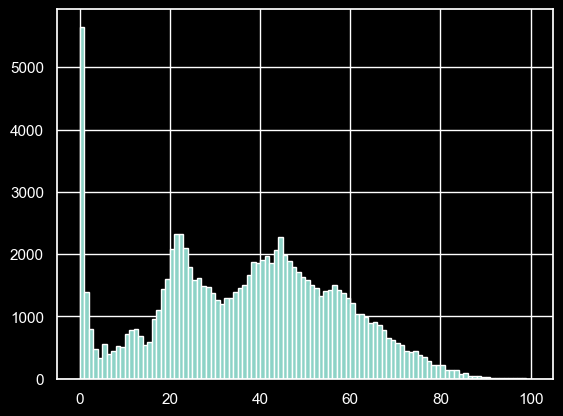

In [60]:
# cehcking the distribution
df['popularity'].hist(bins=100)

what we can grasp from this graph is that there are still a lot of songs with popularity score equal to zero but maybe they are songs of artists that are not known or that by chance have never been listened by those who cretaed the dataset.


## Prediction

### Import the dataset for the prediction task

In [69]:
df_prediction = df
df_prediction.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
39463,0000vdREvCVMxbQTkS888c,Rill,Lolly,Lolly,44,160725,True,0.910,0.374,8,-9.844,0,0.1990,0.075700,0.00301,0.1540,0.432,104.042,4,german
17586,000CC8EParg64OmTxVnZ0p,Glee Cast,Glee Love Songs,It's All Coming Back To Me Now (Glee Cast Vers...,47,322933,False,0.269,0.516,0,-7.361,1,0.0366,0.406000,0.00000,0.1170,0.341,178.174,4,club
73441,000Iz0K615UepwSJ5z2RE5,Paul Kalkbrenner;Pig&Dan,X,Böxig Leise - Pig & Dan Remix,22,515360,False,0.686,0.560,5,-13.264,0,0.0462,0.001140,0.18100,0.1110,0.108,119.997,4,minimal-techno
51365,000RDCYioLteXcutOjeweY,Jordan Sandhu,Teeje Week,Teeje Week,62,190203,False,0.679,0.770,0,-3.537,1,0.1900,0.058300,0.00000,0.0825,0.839,161.721,4,hip-hop
73649,000qpdoc97IMTBvF8gwcpy,Paul Kalkbrenner,Zeit,Tief,19,331240,False,0.519,0.431,6,-13.606,0,0.0291,0.000964,0.72000,0.0916,0.234,129.971,4,minimal-techno


We have already seen that there are multiple observations with the same 'track_id', as this feature represents a unique song that may belong to different albums or be recognized with different music genres. For the prediction of the 'popularity', I want to keep only the most popular version of each song.

In [72]:
# I order the observation first on the "track_id" and then on the "popularity"
df_prediction.sort_values(by=['track_id', 'popularity'], inplace=True)

# I drop all the duplicates based on the "track_id" variable, and keep only the first observation,
# that is the one with the highest "popularity" score 
df_prediction.drop_duplicates(subset="track_id", keep='first', inplace=True)

In [73]:
# I check if in the dataset the "track_id" variable has only unique observation
print(df_prediction.shape[0])
print(df_prediction.nunique())

82249
track_id            82249
artists             30815
album_name          45536
track_name          70617
popularity            101
duration_ms         49308
explicit                2
danceability         1156
energy               2065
key                    12
loudness            19181
mode                    2
speechiness          1487
acousticness         5043
instrumentalness     5334
liveness             1719
valence              1780
tempo               43999
time_signature          5
track_genre           113
dtype: int64


In [74]:
# Remove the "track_id" and "track_name" columns from the dataset
df_prediction = df_prediction.drop(columns=['track_id', 'track_name'])

### Split train and test

In [75]:
# Define the dependent variable (y) and the independent variables (X)
y = df_prediction['popularity']
X = df_prediction.drop('popularity', axis=1)

In [76]:
from sklearn.model_selection import train_test_split
X_train_prediction, X_test_prediction, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [77]:
X_train_prediction

,artists,album_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
16222,Franz Schubert;Camille Thomas;Brussels Philhar...,The Best Classical Playlist,185506,False,0.215,0.184,2,-15.551,0,0.0485,0.957000,0.881000,0.1240,0.0949,83.917,4,classical
38388,Royal Republic,Weekend Man,137306,False,0.528,0.973,11,-3.798,0,0.1060,0.000661,0.000000,0.3630,0.4730,94.009,4,garage
105158,Oyh!,1 Step Ahead,120019,False,0.639,0.435,0,-11.968,1,0.0873,0.862000,0.866000,0.0989,0.3420,80.375,4,study
37945,Leo Santana,GG Astral (Ao Vivo),177412,False,0.829,0.885,7,-2.469,1,0.0930,0.803000,0.000010,0.4720,0.5680,115.071,4,funk
80435,Mithoon;Mohit Chauhan;Sukhwinder Singh;Badshah...,Shivaay,294331,False,0.598,0.813,9,-6.107,1,0.0660,0.278000,0.000000,0.1090,0.3110,140.101,4,pop-film
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86482,Québec Redneck Bluegrass Project,J'ai Bu,236921,False,0.417,0.720,2,-7.666,1,0.0418,0.804000,0.000056,0.1410,0.7260,170.008,3,punk
27344,Hybrid Minds;Holly Drummond,Mountains,344046,False,0.628,0.671,4,-6.556,0,0.0790,0.065800,0.812000,0.0654,0.2600,173.025,4,drum-and-bass
71612,Disturbed,Indestructible (Deluxe Edition),278026,False,0.429,0.966,8,-4.605,1,0.0733,0.000209,0.124000,0.3710,0.5250,179.956,4,metal
104511,IZAL,Autoterapia,289140,False,0.548,0.838,11,-5.683,1,0.1610,0.076100,0.000134,0.3270,0.4380,156.914,4,spanish


### Encoding and Scaling

In [78]:
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82249 entries, 39463 to 82357
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           82249 non-null  object 
 1   album_name        82249 non-null  object 
 2   popularity        82249 non-null  int64  
 3   duration_ms       82249 non-null  int64  
 4   explicit          82249 non-null  bool   
 5   danceability      82249 non-null  float64
 6   energy            82249 non-null  float64
 7   key               82249 non-null  int64  
 8   loudness          82249 non-null  float64
 9   mode              82249 non-null  int64  
 10  speechiness       82249 non-null  float64
 11  acousticness      82249 non-null  float64
 12  instrumentalness  82249 non-null  float64
 13  liveness          82249 non-null  float64
 14  valence           82249 non-null  float64
 15  tempo             82249 non-null  float64
 16  time_signature    82249 non-null  in

Let's encode the categorical variables "album_name", "artists" and "track_genre" using vaex

In [79]:
# Convert the train and test columns "album_name", "artists" and "track_genre" to Vaex 
X_train_prediction_vaex = vaex.from_pandas(X_train_prediction[["album_name", "artists", "track_genre"]])
X_test_prediction_vaex = vaex.from_pandas(X_test_prediction[["album_name", "artists", "track_genre"]])

# Encod the three columns through the MultiHotEncoder 
multi_hot_encoder_prediction = vaex.ml.MultiHotEncoder(features=["artists", "album_name", "track_genre"], fill_value=0)

# fid and transform on the train but only transform on the test
X_train_prediction_vaex = multi_hot_encoder_prediction.fit_transform(X_train_prediction_vaex)
X_test_prediction_vaex = multi_hot_encoder_prediction.transform(X_test_prediction_vaex)

In [80]:
# Drop the "album_name", "artists" and "track_genre" original categorical variables from both sets
X_train_prediction = X_train_prediction.drop(["album_name", "artists", "track_genre"], axis=1)
X_test_prediction = X_test_prediction.drop(["album_name", "artists", "track_genre"], axis=1)

X_train_prediction.head()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
16222,185506,False,0.215,0.184,2,-15.551,0,0.0485,0.957000,0.88100,0.1240,0.0949,83.917,4
38388,137306,False,0.528,0.973,11,-3.798,0,0.1060,0.000661,0.00000,0.3630,0.4730,94.009,4
105158,120019,False,0.639,0.435,0,-11.968,1,0.0873,0.862000,0.86600,0.0989,0.3420,80.375,4
37945,177412,False,0.829,0.885,7,-2.469,1,0.0930,0.803000,0.00001,0.4720,0.5680,115.071,4
80435,294331,False,0.598,0.813,9,-6.107,1,0.0660,0.278000,0.00000,0.1090,0.3110,140.101,4


In [81]:
# Reconvert the 3 columns from vaex to pandas
encoded_train_prediction = pd.DataFrame(X_train_prediction_vaex)
encoded_test_prediction = pd.DataFrame(X_test_prediction_vaex)

# Reset the index of the encoded train and test sets
encoded_train_prediction.reset_index(drop=True, inplace=True)
encoded_test_prediction.reset_index(drop=True, inplace=True)

# Concatenate only the train encoded set to the original one
X_train_prediction = pd.concat([encoded_train_prediction, X_train_prediction.reset_index(drop=True)], axis=1)
X_test_prediction = pd.concat([encoded_test_prediction, X_test_prediction.reset_index(drop=True)], axis=1)

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from category_encoders import BinaryEncoder

# Convert all columns names to string, because ColumnTransformer expect all names as string type
X_train_prediction.columns = X_train_prediction.columns.astype(str)
X_test_prediction.columns = X_test_prediction.columns.astype(str)

# Define column transformer
# I set in the encoder handle_unknown="ignore" to ensure In summary, 
# to preserve the observation of the author column
ct_prediction = ColumnTransformer(
    [('binary', BinaryEncoder(), ["explicit"]), 
     ('scale', MinMaxScaler(), ["duration_ms", "danceability", "key", "loudness",
                                  "speechiness", "acousticness", "valence", "tempo", "time_signature"])],
                                   remainder="passthrough")

X_train_prediction = ct_prediction.fit_transform(X_train_prediction)
X_test_prediction = ct_prediction.transform(X_test_prediction)

In [83]:
# Let's see if the preprocess has been performed correctly
print(pd.DataFrame(X_train_prediction).head())
print(pd.DataFrame(X_test_prediction).head())

    0         1         2         3         4         5         6         7   \
0  0.0  0.035220  0.218496  0.181818  0.626980  0.050259  0.960843  0.095377   
1  0.0  0.025118  0.536585  1.000000  0.845279  0.109845  0.000664  0.475377   
2  0.0  0.021495  0.649390  0.000000  0.693531  0.090466  0.865462  0.343719   
3  0.0  0.033523  0.842480  0.636364  0.869964  0.096373  0.806225  0.570854   
4  0.0  0.058027  0.607724  0.818182  0.802392  0.068394  0.279116  0.312563   

         8    9   ...   45   46   47   48   49   50     51   52       53  \
0  0.376977  0.8  ...  0.0  1.0  0.0  0.0  0.0  1.0  0.184  0.0  0.88100   
1  0.422313  0.8  ...  1.0  0.0  0.0  1.0  1.0  1.0  0.973  0.0  0.00000   
2  0.361066  0.8  ...  1.0  0.0  1.0  0.0  0.0  1.0  0.435  1.0  0.86600   
3  0.516929  0.8  ...  1.0  0.0  0.0  1.0  1.0  0.0  0.885  1.0  0.00001   
4  0.629370  0.8  ...  0.0  1.0  0.0  0.0  1.0  0.0  0.813  1.0  0.00000   

       54  
0  0.1240  
1  0.3630  
2  0.0989  
3  0.4720  
4 

### Build the model

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math

# Train a linear regression model on the training set
l_regression = LinearRegression()
l_regression.fit(X_train_prediction, y_train)

# Predict the target variable using the test set
y_test_pred = l_regression.predict(X_test_prediction)

# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
r2 = metrics.r2_score(y_test, y_test_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"Mean squared error: {mse:.2f}")
print(f"Root mean squared error: {rmse:.2f}")
print(f"Mean absolute error: {mae:.2f}")
print(f"Coefficient of determination (R-squared): {r2:.2f}")

Mean squared error: 328.36
Root mean squared error: 18.12
Mean absolute error: 14.65
Coefficient of determination (R-squared): 0.09


In [85]:
from sklearn.neighbors import KNeighborsRegressor

# Create a KNN regessor object with k=5
knn = KNeighborsRegressor(n_neighbors=40)

# Fit the KNN model to the training data
knn.fit(X_train_prediction, y_train)

# Make predictions on the testing data
y_test_pred = knn.predict(X_test_prediction)

# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
r2 = metrics.r2_score(y_test, y_test_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"Mean squared error: {mse:.2f}")
print(f"Root mean squared error: {rmse:.2f}")
print(f"Mean absolute error: {mae:.2f}")
print(f"Coefficient of determination (R-squared): {r2:.2f}")

Mean squared error: 256.37
Root mean squared error: 16.01
Mean absolute error: 12.49
Coefficient of determination (R-squared): 0.29


In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Create a random forest model with 100 trees
rf = RandomForestRegressor(n_estimators=200, max_depth= 10, min_samples_split= 3, random_state = 0)

# Fit the model to the training data
rf.fit(X_train_prediction, y_train)

# Predict the target variable using the testing set
y_test_pred = rf.predict(X_test_prediction)

# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
r2 = metrics.r2_score(y_test, y_test_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"Mean squared error: {mse:.2f}")
print(f"Root mean squared error: {rmse:.2f}")
print(f"Mean absolute error: {mae:.2f}")
print(f"Coefficient of determination (R-squared): {r2:.2f}")

KeyboardInterrupt: 

ZeroInflatedNegativeBinomialP

1. Train a classifier to tell us whether the target is zero, or not. 
2. Train a regressor on all samples with a non-zero target.

In [ ]:
pip install scikit-lego

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.9/230.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=1c02e5995c26caf09dff3b7cb323bc9093f12d28037577c643dc2c91bf1caa56
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=8236f9d1c9de713aa6a67e7b9238f8700096c4d847d01c36025351f4345c4778
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklego.meta import ZeroInflatedRegressor

# Instantiate a ZeroInflatedRegressor object
zir = ZeroInflatedRegressor(
    classifier=LogisticRegression(random_state=0),
    regressor=RandomForestRegressor(n_estimators=100, max_depth= 10, min_samples_split= 3, random_state = 0)
)

# Fit the ZeroInflatedRegressor object on the training data
zir.fit(X_train_prediction, y_train)

# Make predictions on the testing data
y_test_pred = zir.predict(X_test_prediction)

# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
r2 = metrics.r2_score(y_test, y_test_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"Mean squared error: {mse:.2f}")
print(f"Root mean squared error: {rmse:.2f}")
print(f"Mean absolute error: {mae:.2f}")
print(f"Coefficient of determination (R-squared): {r2:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean squared error: 278.73
Root mean squared error: 16.70
Mean absolute error: 12.46
Coefficient of determination (R-squared): 0.34


XGBoost

In [88]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=1000, max_depth=6, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8, gamma=1, random_state=42)
xgb_model.fit(X_train_prediction, y_train)

y_pred_xgb = xgb_model.predict(X_test_prediction)

# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
r2 = metrics.r2_score(y_test, y_test_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"Mean squared error: {mse:.2f}")
print(f"Root mean squared error: {rmse:.2f}")
print(f"Mean absolute error: {mae:.2f}")
print(f"Coefficient of determination (R-squared): {r2:.2f}")

ModuleNotFoundError: No module named 'xgboost'

Neural Network

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_prediction.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

nn_model.fit(X_train_prediction, y_train, epochs=50, batch_size=32)

y_test_pred = nn_model.predict(X_test_prediction).flatten()

# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
r2 = metrics.r2_score(y_test, y_test_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"Mean squared error: {mse:.2f}")
print(f"Root mean squared error: {rmse:.2f}")
print(f"Mean absolute error: {mae:.2f}")
print(f"Coefficient of determination (R-squared): {r2:.2f}")

KeyboardInterrupt: 

# IDEA : Transpose the problem to a classification problem 

### Import the dataset

In [92]:
df_class = df
df_class.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
39463,0000vdREvCVMxbQTkS888c,Rill,Lolly,Lolly,44,160725,True,0.910,0.374,8,-9.844,0,0.1990,0.075700,0.00301,0.1540,0.432,104.042,4,german
17586,000CC8EParg64OmTxVnZ0p,Glee Cast,Glee Love Songs,It's All Coming Back To Me Now (Glee Cast Vers...,47,322933,False,0.269,0.516,0,-7.361,1,0.0366,0.406000,0.00000,0.1170,0.341,178.174,4,club
73441,000Iz0K615UepwSJ5z2RE5,Paul Kalkbrenner;Pig&Dan,X,Böxig Leise - Pig & Dan Remix,22,515360,False,0.686,0.560,5,-13.264,0,0.0462,0.001140,0.18100,0.1110,0.108,119.997,4,minimal-techno
51365,000RDCYioLteXcutOjeweY,Jordan Sandhu,Teeje Week,Teeje Week,62,190203,False,0.679,0.770,0,-3.537,1,0.1900,0.058300,0.00000,0.0825,0.839,161.721,4,hip-hop
73649,000qpdoc97IMTBvF8gwcpy,Paul Kalkbrenner,Zeit,Tief,19,331240,False,0.519,0.431,6,-13.606,0,0.0291,0.000964,0.72000,0.0916,0.234,129.971,4,minimal-techno


### Data Cleaning

In [93]:
# Remove the "track_id", "track_name", "artists" and "album_name" columns from the dataset
df_class.drop(columns=['track_id', 'track_name', 'artists', 'album_name'], inplace=True)
df_class.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
39463,44,160725,True,0.910,0.374,8,-9.844,0,0.1990,0.075700,0.00301,0.1540,0.432,104.042,4,german
17586,47,322933,False,0.269,0.516,0,-7.361,1,0.0366,0.406000,0.00000,0.1170,0.341,178.174,4,club
73441,22,515360,False,0.686,0.560,5,-13.264,0,0.0462,0.001140,0.18100,0.1110,0.108,119.997,4,minimal-techno
51365,62,190203,False,0.679,0.770,0,-3.537,1,0.1900,0.058300,0.00000,0.0825,0.839,161.721,4,hip-hop
73649,19,331240,False,0.519,0.431,6,-13.606,0,0.0291,0.000964,0.72000,0.0916,0.234,129.971,4,minimal-techno


### Preprocess

Let's redifine the popularity variable, dividing the score into 3 classes. "low_popularity", "madium_popularity", "high_popularity"

The new "popularity" will have the "low" class (popularity score <= 33), the "medium" class (popularity score between 33 and 66) and the "high" class (popularity score > 66). The range of popularity score is not the same since the variable "popularity" is 0-inflated and right-skewed

In [94]:
# Using the method iterrows we iterate over all the rows of the dataframe.
# With iloc I mantein the new classes in the original dataset
for index, row in df_class.iterrows():
    if row["popularity"] <= 33: 
        df_class.loc[index, "popularity"] = "low"
    elif row["popularity"] > 33 and row["popularity"] <= 66:
        df_class.loc[index, "popularity"] = "medium"
    else: 
        df_class.loc[index, "popularity"] = "high"

print(df_class["popularity"])

39463    medium
17586    medium
73441       low
51365    medium
73649       low
          ...  
80856    medium
26387       low
70175    medium
32730    medium
82357       low
Name: popularity, Length: 82249, dtype: object


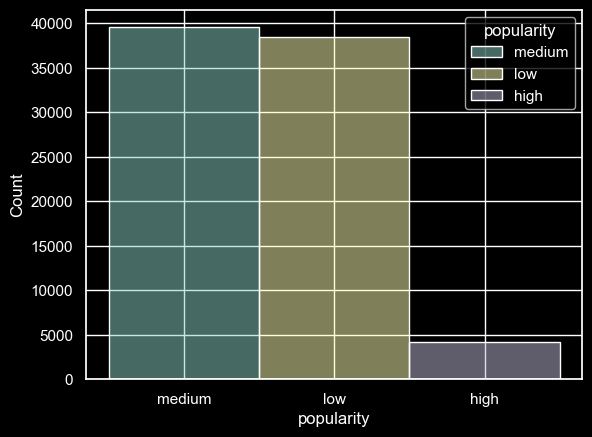

In [97]:
# Plot the distribution of each class from low to high
sns.histplot(data=df_class, x="popularity", hue="popularity")

# show the plot
plt.show()

### Split train and test

In [98]:
# Define the dependent variable (y) and the independent variables (X)
y_class = df_class['popularity']
X_class = df_class.drop('popularity', axis=1)

# Let's check the results 
print(y_class)
print(X_class)

39463    medium
17586    medium
73441       low
51365    medium
73649       low
          ...  
80856    medium
26387       low
70175    medium
32730    medium
82357       low
Name: popularity, Length: 82249, dtype: object
       duration_ms  explicit  danceability   energy  key  loudness  mode  \
39463       160725      True         0.910  0.37400    8    -9.844     0   
17586       322933     False         0.269  0.51600    0    -7.361     1   
73441       515360     False         0.686  0.56000    5   -13.264     0   
51365       190203     False         0.679  0.77000    0    -3.537     1   
73649       331240     False         0.519  0.43100    6   -13.606     0   
...            ...       ...           ...      ...  ...       ...   ...   
80856       325156     False         0.766  0.38200    7   -11.464     0   
26387       109573     False         0.529  0.00879   10   -32.266     1   
70175       260573     False         0.423  0.36000    3    -9.458     1   
32730       23430

In [99]:
from sklearn.model_selection import train_test_split

# Since the three classess are unbalanced, we set the "stratify" parameter equal to the target variable in order to mantain
# the same proportion between each class classes of "popularity" in both the train and test sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, 
                                                                            test_size = 0.25, random_state = 0, stratify=y_class)

In [100]:
print(pd.DataFrame(y_train_class).value_counts())
print(pd.DataFrame(y_test_class).value_counts())

popularity
medium        29673
low           28879
high           3134
dtype: int64
popularity
medium        9892
low           9626
high          1045
dtype: int64


### Encoding and scaling

In [101]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82249 entries, 39463 to 82357
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        82249 non-null  object 
 1   duration_ms       82249 non-null  int64  
 2   explicit          82249 non-null  bool   
 3   danceability      82249 non-null  float64
 4   energy            82249 non-null  float64
 5   key               82249 non-null  int64  
 6   loudness          82249 non-null  float64
 7   mode              82249 non-null  int64  
 8   speechiness       82249 non-null  float64
 9   acousticness      82249 non-null  float64
 10  instrumentalness  82249 non-null  float64
 11  liveness          82249 non-null  float64
 12  valence           82249 non-null  float64
 13  tempo             82249 non-null  float64
 14  time_signature    82249 non-null  int64  
 15  track_genre       82249 non-null  object 
dtypes: bool(1), float64(9), int64(4), ob

Let's encode the categorical variable "track_genre" using vaex

In [102]:
pd.DataFrame(X_train_class).columns

Index(['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [103]:
# Convert the train and test column "track_genre" to Vaex 
X_train_class_vaex = vaex.from_pandas(pd.DataFrame(X_train_class["track_genre"]))
X_test_class_vaex = vaex.from_pandas(pd.DataFrame(X_test_class["track_genre"]))

# Encod the column through the MultiHotEncoder 
multi_hot_encoder_class = vaex.ml.MultiHotEncoder(features=["track_genre"], fill_value=0)

# fid and transform on the train but only transform on the test
X_train_class_vaex = multi_hot_encoder_class.fit_transform(X_train_class_vaex)
X_test_class_vaex = multi_hot_encoder_class.transform(X_test_class_vaex)

In [104]:
# Drop the "track_genre" original categorical variables from both sets
X_train_class = X_train_class.drop(["track_genre"], axis=1)
X_test_class = X_test_class.drop(["track_genre"], axis=1)

X_train_class.head()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
72755,240898,True,0.483,0.971,6,-3.191,1,0.1580,0.000088,0.000000,0.2180,0.167,115.001,4
90723,153321,False,0.496,0.611,5,-8.877,0,0.0499,0.213000,0.000011,0.0583,0.974,206.354,4
58540,285933,False,0.680,0.855,6,-9.102,0,0.0472,0.000254,0.809000,0.1160,0.891,100.984,3
90292,160760,False,0.374,0.567,9,-8.989,1,0.0490,0.005150,0.000050,0.0505,0.690,191.142,4
4074,228164,False,0.261,0.371,3,-10.112,1,0.0313,0.960000,0.856000,0.1090,0.149,158.924,4


In [105]:
# Reconvert the column from vaex to pandas
encoded_train_class = pd.DataFrame(X_train_class_vaex)
encoded_test_class = pd.DataFrame(X_test_class_vaex)

# Reset the index of the encoded train and test sets
encoded_train_class.reset_index(drop=True, inplace=True)
encoded_test_class.reset_index(drop=True, inplace=True)

# Concatenate only the train encoded set to the original one
X_train_class = pd.concat([encoded_train_class, X_train_class.reset_index(drop=True)], axis=1)
X_test_class = pd.concat([encoded_test_class, X_test_class.reset_index(drop=True)], axis=1)

# Let's see the results 
print(X_train_class)
print(X_test_class)

         0    1    2    3    4    5    6    7  duration_ms  explicit  ...  \
0      0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0       240898      True  ...   
1      0.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0       153321     False  ...   
2      0.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0       285933     False  ...   
3      0.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0       160760     False  ...   
4      0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0       228164     False  ...   
...    ...  ...  ...  ...  ...  ...  ...  ...          ...       ...  ...   
61681  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0       228826     False  ...   
61682  0.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0       125480     False  ...   
61683  0.0  0.0  1.0  1.0  1.0  0.0  1.0  0.0       277623     False  ...   
61684  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0       146600     False  ...   
61685  0.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0       150266     False  ...   

       key  loudness  mode  speechiness  acousticness  instrumentalness  \


In [106]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from category_encoders import BinaryEncoder

# Convert all columns names to string, because ColumnTransformer expect all names as string type
# and from Vaex I have some columns with a name based on some integers
pd.DataFrame(X_train_class).columns = pd.DataFrame(X_train_class).columns.astype(str)
pd.DataFrame(X_test_class).columns = pd.DataFrame(X_test_class).columns.astype(str)

# Define column transformer
# I set in the encoder handle_unknown="ignore" to ensure In summary, 
# to preserve the observation of the author column
ct_class = ColumnTransformer(
    [('binary', BinaryEncoder(), ["explicit"]), 
     ('scale', MinMaxScaler(), ["duration_ms", "danceability", "key", "loudness",
                                  "speechiness", "acousticness", "valence", "tempo", "time_signature"])],
                                   remainder="passthrough")

X_train_class = ct_class.fit_transform(X_train_class)
X_test_class = ct_class.transform(X_test_class)

In [107]:
# Let's see if the preprocess has been performed correctly
print(pd.DataFrame(X_train_class).head())
print(pd.DataFrame(X_test_class).head())

    0         1         2         3         4         5         6         7   \
0  1.0  0.044430  0.490355  0.545455  0.857148  0.163731  0.000089  0.168177   
1  0.0  0.027681  0.503553  0.454545  0.751975  0.051710  0.213855  0.980866   
2  0.0  0.053043  0.690355  0.545455  0.747813  0.048912  0.000255  0.897281   
3  0.0  0.029104  0.379695  0.818182  0.749903  0.050777  0.005171  0.694864   
4  0.0  0.041995  0.264975  0.272727  0.729131  0.032435  0.963855  0.150050   

         8    9   ...   12   13   14   15   16   17     18   19        20  \
0  0.472532  0.8  ...  0.0  0.0  1.0  0.0  0.0  1.0  0.971  1.0  0.000000   
1  0.847895  0.8  ...  0.0  1.0  1.0  1.0  0.0  0.0  0.611  0.0  0.000011   
2  0.414937  0.6  ...  1.0  1.0  1.0  0.0  1.0  1.0  0.855  0.0  0.809000   
3  0.785390  0.8  ...  0.0  1.0  1.0  1.0  0.0  0.0  0.567  1.0  0.000050   
4  0.653009  0.8  ...  0.0  0.0  0.0  1.0  0.0  1.0  0.371  1.0  0.856000   

       21  
0  0.2180  
1  0.0583  
2  0.1160  
3  0.050

Encoding the new dependent variable

In [108]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


order = ['low', 'medium', 'high']
le.fit(order)
y_train_class = le.fit_transform(y_train_class)
y_test_class = le.transform(y_test_class)

### Build the model

Decision Tree

Accuracy on the train: 0.7955451804299193
Accuracy on the test: 0.725915479258863
Recall on the train: 0.637868188751192
Recall on the test: 0.5641718794079286
Precision on the train: 0.7345998037566086
Precision on the test: 0.6244384165447504


<AxesSubplot:>

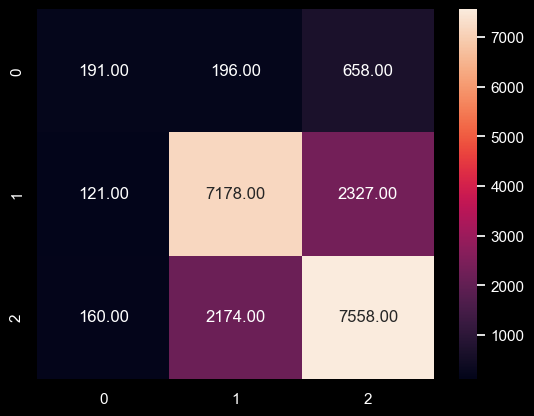

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Create a Decision Tree Classifier object
clf = DecisionTreeClassifier(max_depth=12)

# Train the classifier on the training data
clf.fit(X_train_class, y_train_class)

# Make predictions on the testing data
y_train_pred = clf.predict(X_train_class)

# Make predictions on the testing data
y_test_pred = clf.predict(X_test_class)

# Calculate the accuracy of the classifier
accuracy_train = accuracy_score(y_train_class, y_train_pred)
accuracy_test = accuracy_score(y_test_class, y_test_pred)
print('Accuracy on the train:', accuracy_train)
print('Accuracy on the test:', accuracy_test)

# Calculate the recall
recall_train = recall_score(y_train_class, y_train_pred, average='macro')
recall_test = recall_score(y_test_class, y_test_pred, average='macro')
print('Recall on the train:', recall_train)
print('Recall on the test:', recall_test)

# Calculate the precision
precision_train = precision_score(y_train_class, y_train_pred, average='macro')
precision_test = precision_score(y_test_class, y_test_pred, average='macro')
print('Precision on the train:', precision_train)
print('Precision on the test:', precision_test)

# Get the confusion matrix on the test set 
cm = confusion_matrix(y_test_class, y_test_pred)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='.2f')

KNN

/Users/francescomigliore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/francescomigliore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the val

Accuracy on the train: 0.7795772136303213
Accuracy on the test: 0.766425132519574
Recall on the train: 0.5974142070483547
Recall on the test: 0.5813025247925855
Precision on the train: 0.6951525120278418
Precision on the test: 0.6663078983568967


<AxesSubplot:>

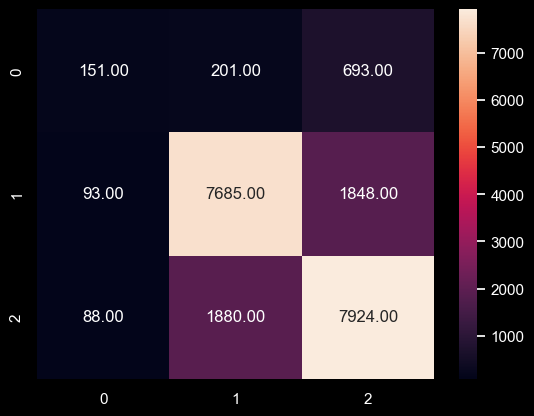

In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Instantiate a KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=40)

# Train the classifier on the training set
knn.fit(X_train_class, y_train_class)

# Make predictions on the testing data
y_train_pred = knn.predict(X_train_class)

# Make predictions on the testing data
y_test_pred = knn.predict(X_test_class)

# Calculate the accuracy of the classifier
accuracy_train = accuracy_score(y_train_class, y_train_pred)
accuracy_test = accuracy_score(y_test_class, y_test_pred)
print('Accuracy on the train:', accuracy_train)
print('Accuracy on the test:', accuracy_test)

# Calculate the recall
recall_train = recall_score(y_train_class, y_train_pred, average='macro')
recall_test = recall_score(y_test_class, y_test_pred, average='macro')
print('Recall on the train:', recall_train)
print('Recall on the test:', recall_test)

# Calculate the precision
precision_train = precision_score(y_train_class, y_train_pred, average='macro')
precision_test = precision_score(y_test_class, y_test_pred, average='macro')
print('Precision on the train:', precision_train)
print('Precision on the test:', precision_test)

# Get the confusion matrix on the test set 
cm = confusion_matrix(y_test_class, y_test_pred)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='.2f')

Random forest

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the random forest classifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10],
    
}

# Define the grid search object with cross-validation
grid_search = GridSearchCV(
    rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search object to the resampled training data
grid_search.fit(X_train_class, y_train_class)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

NameError: name 'X_train_resampled' is not defined

Accuracy on the train: 0.7609668320202315
Accuracy on the test: 0.7213927928804162
Recall on the train: 0.5338624435482112
Recall on the test: 0.5059960545706078
Precision on the train: 0.5139041581457637
Precision on the test: 0.4876050478702309


/Users/francescomigliore/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/francescomigliore/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

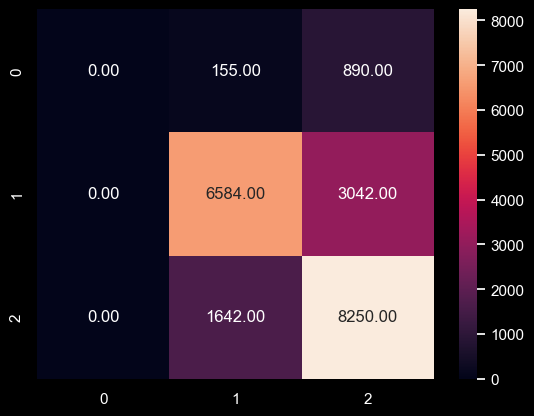

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Create a Random Forest Classifier object
rf = RandomForestClassifier(n_estimators=200, criterion= "gini", max_depth=10, min_samples_split = 3, random_state=42)

# Train the classifier on the training data
rf.fit(X_train_class, y_train_class)

# Make predictions on the testing data
y_train_pred = rf.predict(X_train_class)

# Make predictions on the testing data
y_test_pred = rf.predict(X_test_class)

# Calculate the accuracy of the classifier
accuracy_train = accuracy_score(y_train_class, y_train_pred)
accuracy_test = accuracy_score(y_test_class, y_test_pred)
print('Accuracy on the train:', accuracy_train)
print('Accuracy on the test:', accuracy_test)

# Calculate the recall
recall_train = recall_score(y_train_class, y_train_pred, average='macro')
recall_test = recall_score(y_test_class, y_test_pred, average='macro')
print('Recall on the train:', recall_train)
print('Recall on the test:', recall_test)

# Calculate the precision
precision_train = precision_score(y_train_class, y_train_pred, average='macro')
precision_test = precision_score(y_test_class, y_test_pred, average='macro')
print('Precision on the train:', precision_train)
print('Precision on the test:', precision_test)

#Get the confusion matrix on the test set 
cm = confusion_matrix(y_test_class, y_test_pred)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='.2f')

XGBoost

In [118]:
from sklearn.utils.extmath import softmax
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create an XGBoost classifier
XGB = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the hyperparameters for the grid search
params = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 7],
    'n_estimators': [100, 200],
    }

# Perform the grid search using the train and test set
grid_search = GridSearchCV(XGB, params, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train_class, y_train_class)

# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best hyperparameters:", best_params)
print(f"Best accuracy on the train set (cross-validated): {best_score:.4f}")

# Evaluate the model with the best hyperparameters on the test set
y_test_pred = grid_search.predict(X_test_class)
accuracy_test = accuracy_score(y_test_class, y_test_pred)

print(f"Accuracy on the test set: {accuracy_test:.4f}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/Users/francescomigliore/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/francescomigliore/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/francescomigliore/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best accuracy on the train set (cross-validated): 0.7440
Accuracy on the test set: 0.7454


Accuracy on the train: 0.8614434393541485
Accuracy on the test: 0.7588386908525021
Recall on the train: 0.6935048547413095
Recall on the test: 0.5521839043308631
Precision on the train: 0.8851625106706473
Precision on the test: 0.6762784448463351


<AxesSubplot:>

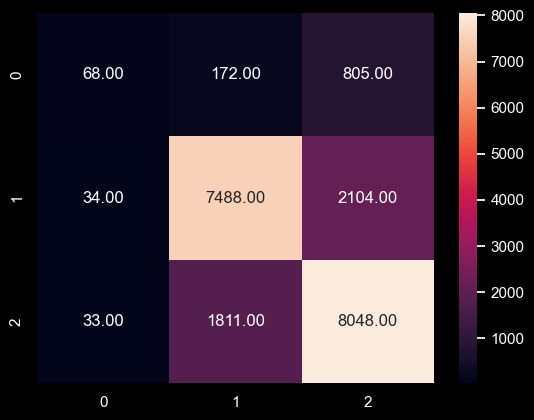

In [120]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Fit model on training data
XGB = XGBClassifier(objective='multi:softmax', num_class=3, learning_rate=0.1, 
                    max_depth=8, n_estimators=200, reg_lambda=1)
XGB.fit(X_train_class, y_train_class)

# Make predictions for train data
y_train_pred = XGB.predict(X_train_class)

# Make predictions for test data
y_test_pred = XGB.predict(X_test_class)

# Calculate the accuracy of the classifier
accuracy_train = accuracy_score(y_train_class, y_train_pred)
accuracy_test = accuracy_score(y_test_class, y_test_pred)
print('Accuracy on the train:', accuracy_train)
print('Accuracy on the test:', accuracy_test)

# Calculate the recall
recall_train = recall_score(y_train_class, y_train_pred, average='macro')
recall_test = recall_score(y_test_class, y_test_pred, average='macro')
print('Recall on the train:', recall_train)
print('Recall on the test:', recall_test)

# Calculate the precision
precision_train = precision_score(y_train_class, y_train_pred, average='macro')
precision_test = precision_score(y_test_class, y_test_pred, average='macro')
print('Precision on the train:', precision_train)
print('Precision on the test:', precision_test)

#Get the confusion matrix on the test set 
cm = confusion_matrix(y_test_class, y_test_pred)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='.2f')